In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

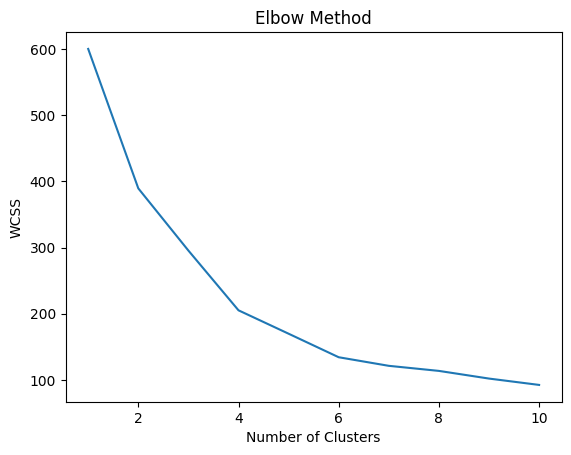

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

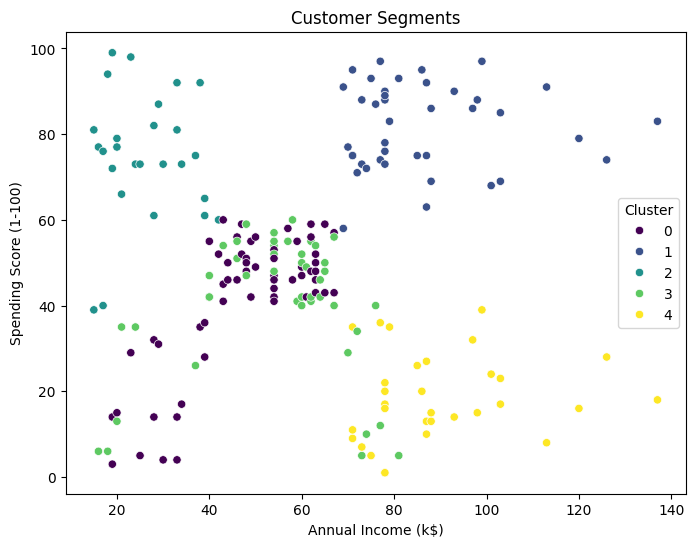

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("Customer Segments")
plt.show()

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

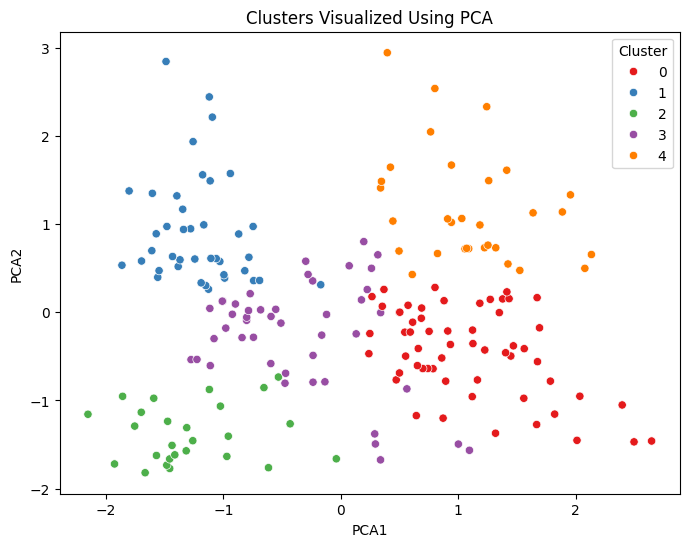

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['PCA1'],
    y=df['PCA2'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("Clusters Visualized Using PCA")
plt.show()

In [11]:
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2
Cluster,,,,,,
0,68.775862,55.275862,47.620690,41.706897,1.089268,-0.445323
1,161.025000,32.875000,86.100000,81.525000,-1.208516,0.914846
2,23.461538,25.769231,26.115385,74.846154,-1.275681,-1.377634
3,86.377778,26.733333,54.311111,40.911111,-0.348135,-0.250826
4,166.870968,44.387097,89.774194,18.483871,1.096673,1.172275
